# QF600 Question 5

###### Prepared By:
Gabriel Woon

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Consumption Growth

In [2]:
# consumption growth (g = e^(0.02 + 0.02ϵ + ν))
simulation = 100000
consumption_growth = np.zeros(simulation)
for i in range(simulation):
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu <0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu)

# Parameters

In [3]:
# subjective discount factor
delta = 0.99

# gamma
gamma = np.arange(0, 4.05, 0.05); gamma

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  ])

# Pricing Kernal

In [4]:
# pricing kernal (M = delta ∗ g ** −γ)
mu_M = []
sigma_M = []

for i in gamma:
    price_kernel = delta * (consumption_growth**(-i))
    mean = np.mean(price_kernel)
    std = np.std(price_kernel)
    
    mu_M.append(mean)
    sigma_M.append(std)

In [5]:
# SD(M)/E(M)
pricing_kernal = pd.DataFrame({'mu_M': mu_M, 'sigma_M':sigma_M}, index=gamma)
pricing_kernal["sigma/mu"] = pricing_kernal["sigma_M"]/pricing_kernal["mu_M"]
pricing_kernal

,mu_M,sigma_M,sigma/mu
0.00,0.990000,0.000000,0.000000
0.05,0.989399,0.003036,0.003069
0.10,0.988809,0.006125,0.006195
0.15,0.988227,0.009269,0.009380
0.20,0.987656,0.012469,0.012624
...,...,...,...
3.80,0.989026,0.514614,0.520324
3.85,0.989972,0.527947,0.533294
3.90,0.990958,0.541556,0.546498
3.95,0.991983,0.555448,0.559937


# Hansen-Jagannathan Bound

In [6]:
HJ_Bound = pricing_kernal.loc[round(pricing_kernal["sigma/mu"], 2) == 0.40]; HJ_Bound

,mu_M,sigma_M,sigma/mu
3.3,0.981537,0.395288,0.402723


## Plot Pricing Kernal-Gamma Line

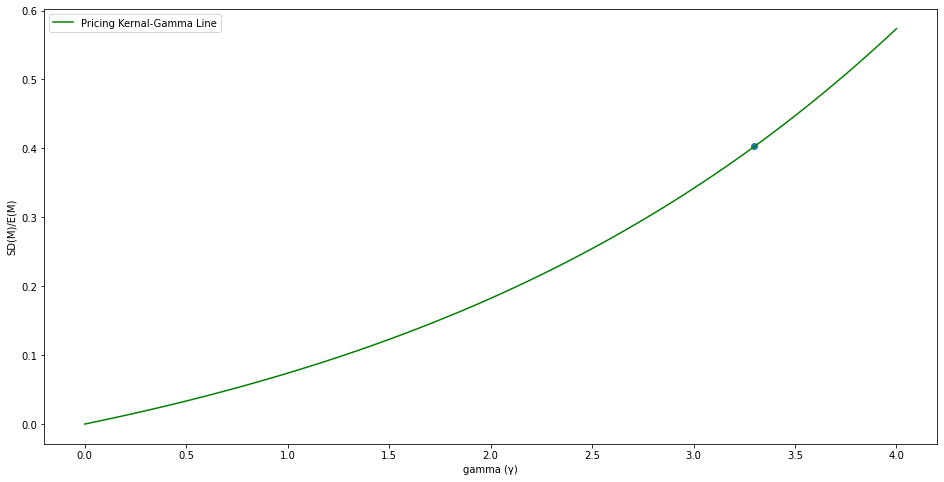

In [7]:
plt.figure(figsize=(16,8))
plt.plot(pricing_kernal["sigma/mu"], 'g')
plt.scatter(HJ_Bound.index, HJ_Bound["sigma/mu"])

plt.ylabel('SD(M)/E(M)')
plt.xlabel('gamma (γ)')
plt.legend(["Pricing Kernal-Gamma Line"], loc = 2)